In [1]:
import numpy as np
from matplotlib.pyplot import *
from sklearn import datasets
import scipy.stats as stats

## Importing the Iris dataset

In [2]:
iris_data = datasets.load_iris()

### Getting the keys

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
des = iris_data.DESCR.split('\n')
for i in des:
    print(i)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

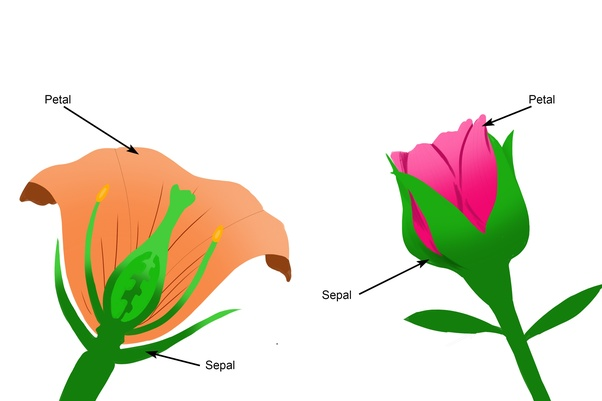

In [5]:
from IPython.display import Image
Image("picture.jpg")

In [6]:
n_samples,n_features = iris_data.data.shape
print('Number of Samples:',n_samples)
print('Number of features:',n_features)

Number of Samples: 150
Number of features: 4


In [7]:
n_targets = iris_data.target.shape[0]
print('Number of Targers:',n_targets)

Number of Targers: 150


### Visualizing the dataset

In [8]:
import pandas as pd

In [9]:
pd.DataFrame(iris_data.data,columns=iris_data.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
pd.DataFrame(iris_data.target).head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


### Trying to understand the features

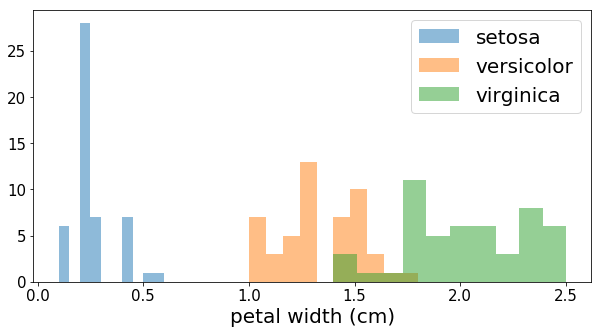

In [12]:
fig = figure(figsize=(10,5))
feature = 3

for label in range(len(iris_data.target_names)):
    hist(iris_data.data[iris_data.target==label, feature],
        label = iris_data.target_names[label], alpha = 0.5)
    
xlabel(iris_data.feature_names[feature], size = 20)
legend(prop={'size': 20})
yticks(size=15)
xticks(size=15)
show()

### Exercise

Plot a similar histogram analyzing the labels with respect to petal length

### Analysing two features simultaneously 

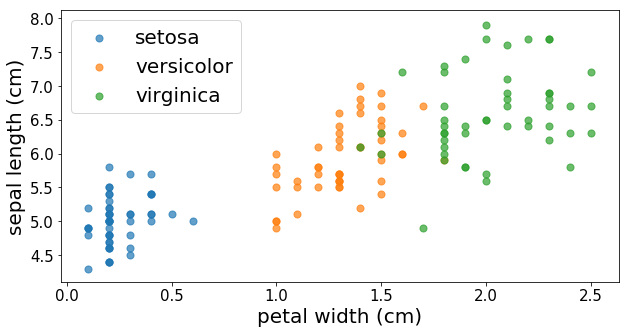

In [13]:
fig = figure(figsize=(10,5))
x = 3
y = 0

for label in range(len(iris_data.target_names)):
    scatter(iris_data.data[iris_data.target==label, x],iris_data.data[iris_data.target==label, y],
        label = iris_data.target_names[label], alpha = 0.7, s = 50)
    
xlabel(iris_data.feature_names[x], size = 20)
ylabel(iris_data.feature_names[y], size = 20)
legend(prop={'size': 20})
yticks(size=15)
xticks(size=15)
show()

### Exercise

Experiment with the combination of the features and try to find which combination provides the best separation

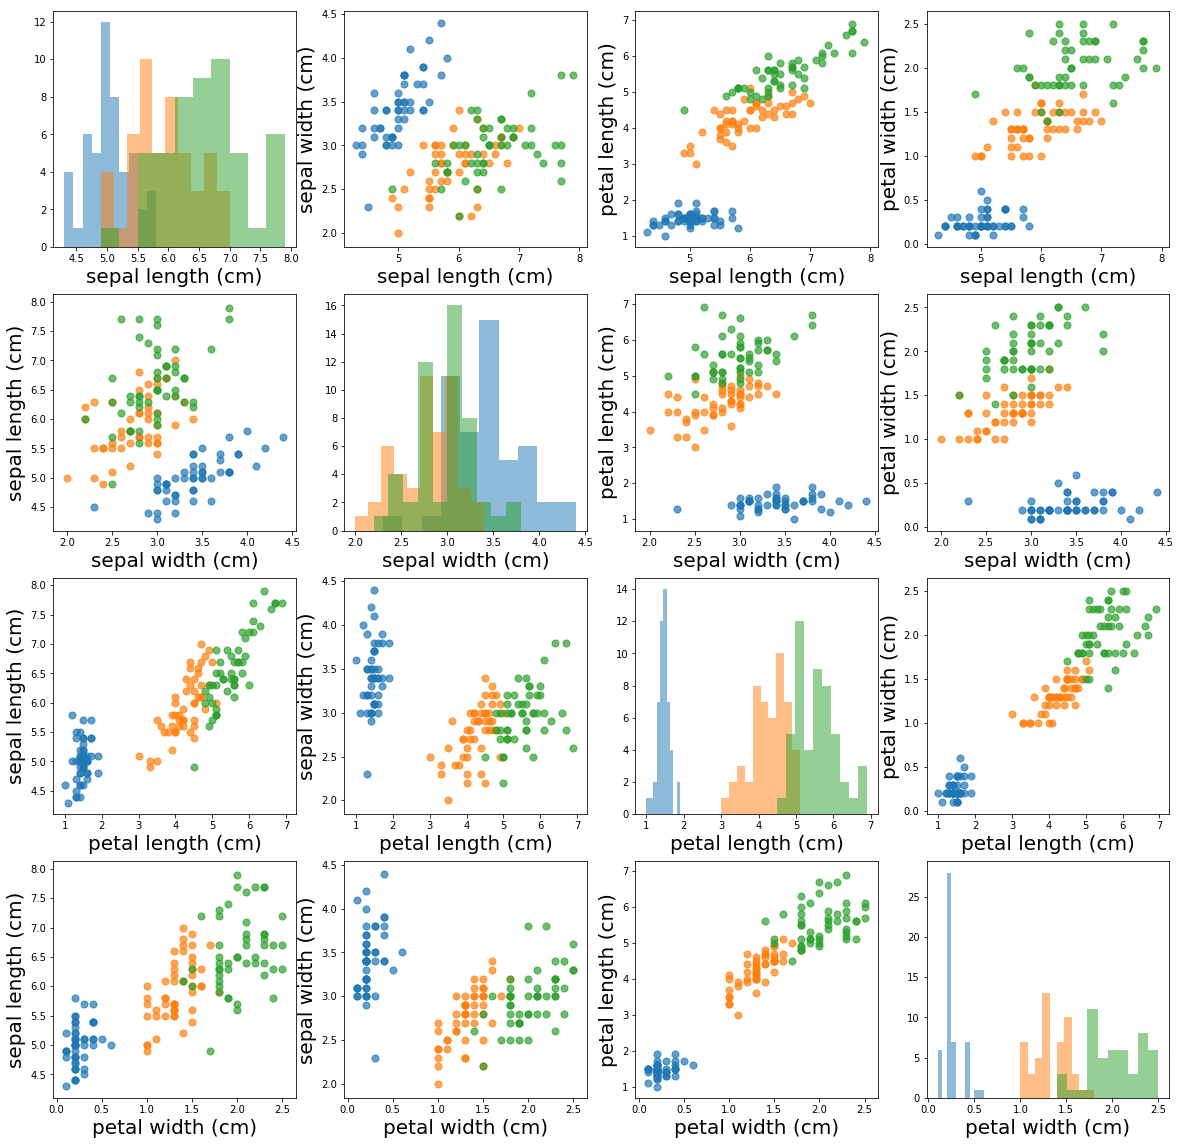

In [14]:
fig = figure(figsize=(20,20))
count = 1
for i in range(len(iris_data.feature_names)):
    for j in range(len(iris_data.feature_names)):
        ax = fig.add_subplot(4, 4, count)
        
        if i!=j:
            for label in range(len(iris_data.target_names)):
                ax.scatter(iris_data.data[iris_data.target==label, i],iris_data.data[iris_data.target==label, j],
                    label = iris_data.target_names[label], alpha = 0.7, s = 50)
            xlabel(iris_data.feature_names[i], size = 20)
            ylabel(iris_data.feature_names[j], size = 20)
            #legend(prop={'size': 15})
            yticks(size=10)
            xticks(size=10)
                
        if i == j:
            for label in range(len(iris_data.target_names)):
                ax.hist(iris_data.data[iris_data.target==label, i],
                    label = iris_data.target_names[label], alpha = 0.5)

            xlabel(iris_data.feature_names[i], size = 20)
            #legend(prop={'size': 15})
            yticks(size=10)
            xticks(size=10)

        count = count + 1
        
show()

### Preprocessing the dataset for Fitting and Evaluating a model

In [15]:
X,y = iris_data.data,iris_data.target

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                   train_size = 0.5,
                                                   test_size = 0.5,
                                                   random_state = 123)
print('Labels for training data')
print(train_y)

Labels for training data
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]


In [18]:
print('Labels for test data')
print(test_y)

Labels for test data
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


### Stratified Sampling can be more useful

In [19]:
np.bincount(iris_data.target)  ## gives number of samples for each label class

array([50, 50, 50])

In [20]:
print('Initial proportions: ',np.bincount(iris_data.target)/len(y))
print('Proportions in Training data: ',np.bincount(train_y)/len(train_y))
print('Proportions in Test data: ',np.bincount(test_y)/len(test_y))

Initial proportions:  [0.33333333 0.33333333 0.33333333]
Proportions in Training data:  [0.30666667 0.4        0.29333333]
Proportions in Test data:  [0.36       0.26666667 0.37333333]


In [21]:
train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                   train_size = 0.5,
                                                   test_size = 0.5,
                                                   random_state = 123,
                                                   stratify = y)
print('Initial proportions: ',np.bincount(iris_data.target)/len(y))
print('Proportions in Training data: ',np.bincount(train_y)/len(train_y))
print('Proportions in Test data: ',np.bincount(test_y)/len(test_y))

Initial proportions:  [0.33333333 0.33333333 0.33333333]
Proportions in Training data:  [0.33333333 0.33333333 0.33333333]
Proportions in Test data:  [0.33333333 0.33333333 0.33333333]


Stratification will basically preserve the original proportions of labels

### A Classification Algorithm: K nearest neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
## Fitting the model
classifier = KNeighborsClassifier().fit(train_X,train_y)

## Predicting on training data
pred_train_y = classifier.predict(train_X)

## Predicting on test data
pred_test_y = classifier.predict(test_X)

## Printing the Accuracy on training and testing data
print('Accuracy on training data: ',sum(pred_train_y==train_y)/len(pred_train_y))
print('Accuracy on testing data: ',sum(pred_test_y==test_y)/len(pred_test_y))

Accuracy on training data:  0.9866666666666667
Accuracy on testing data:  0.96


### Visualizing the results

Since Visualizing the 4 features simultaneously is impossible, so we will use SVD

In [23]:
U,S,Vh = np.linalg.svd(X)
X_principal = X.dot(Vh.T)[:,:2]
X_principal.shape

(150, 2)

In [24]:
U_test,S_test,Vh_test = np.linalg.svd(test_X)
X_principal_test = test_X.dot(Vh_test.T)[:,:2]
X_principal_test.shape

(75, 2)

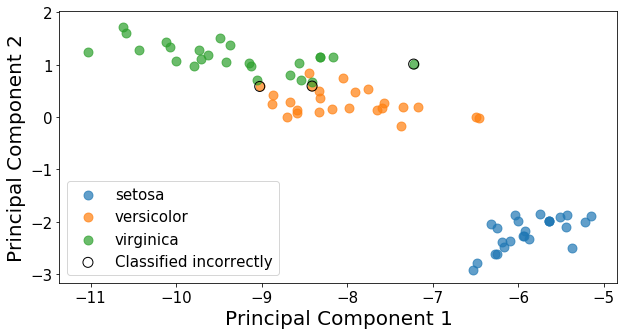

In [25]:
test = correct_indx = np.where(pred_test_y != test_y)

fig = figure(figsize=(10,5))

for label in range(len(iris_data.target_names)):
    scatter(X_principal_test[test_y==label, 0],X_principal_test[test_y==label, 1],
        label = iris_data.target_names[label], alpha = 0.7, s = 80)
    
scatter(X_principal_test[test,0],X_principal_test[test,1],s = 100,edgecolors='k',facecolors='none', label = 'Classified incorrectly')
xlabel('Principal Component 1', size = 20)
ylabel('Principal Component 2', size = 20)
legend(prop={'size': 15})
yticks(size=15)
xticks(size=15)
show()

## Exercise

1. Find the actual label and the predicted label for the misclassified sample
2. Try to Explain why these particular samples were misclassified
3. Does changing the split ratio of training and testing data do anything useful ?
4. Try using just one feature, then any two, then any three. For each of these 3 cases compare the accuracy of the produced model with respect to using all the features.
5. In your opinion which is the most useful feature with respect to KNeighbors Classifier
6. Try to use different number of neighbors and see how algorithm behaves

## Considering the case of two features

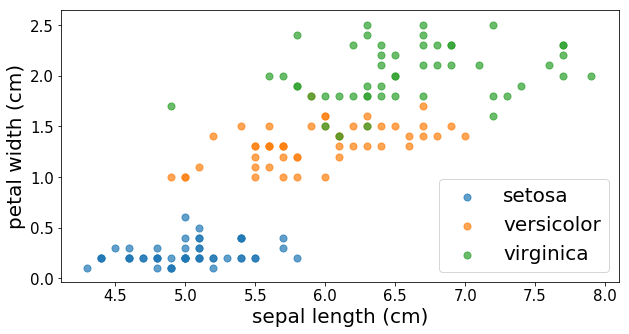

In [26]:
fig = figure(figsize=(10,5))
x = 0
y = 3

for label in range(len(iris_data.target_names)):
    scatter(iris_data.data[iris_data.target==label, x],iris_data.data[iris_data.target==label, y],
        label = iris_data.target_names[label], alpha = 0.7, s = 50)
    
xlabel(iris_data.feature_names[x], size = 20)
ylabel(iris_data.feature_names[y], size = 20)
legend(prop={'size': 20})
yticks(size=15)
xticks(size=15)
show()

### For now lets consider the complete dataset for learning

The objective here is to visualize how well the classifier is doing with different parameters

In [27]:
X,y1 = iris_data.data,iris_data.target
X_train = X[:,[x,y]]
y_train = y1

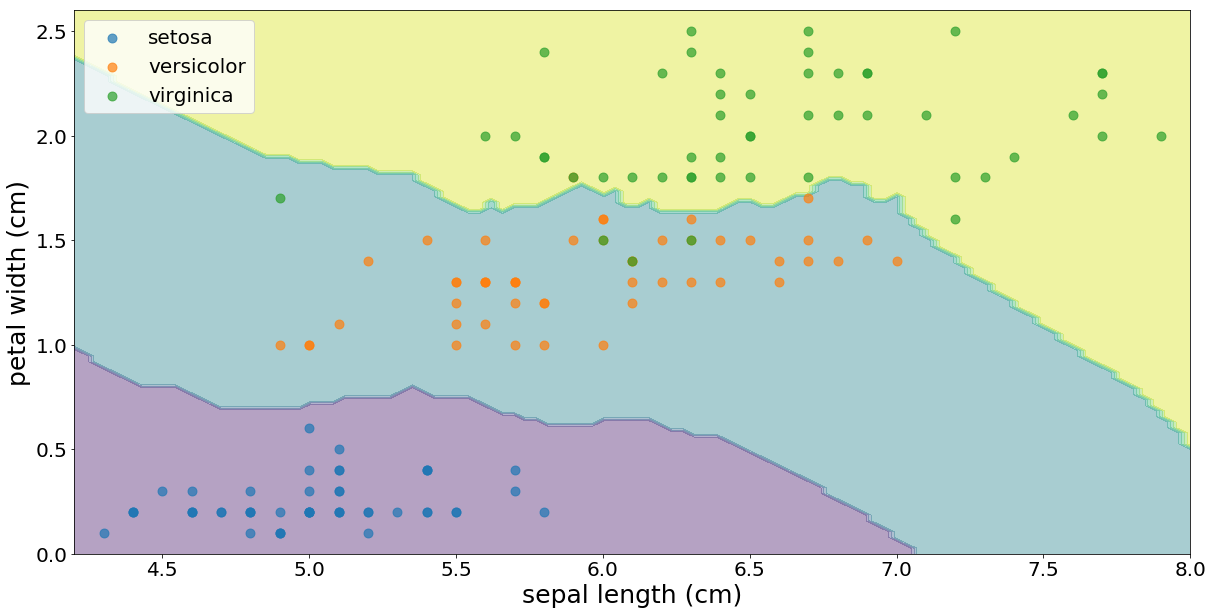

In [28]:
fig = figure(figsize=(20,10))
classifier = KNeighborsClassifier().fit(X_train,y_train)

## Predicting on training data
x_min, x_max = min(X_train[:,0])-0.1,max(X_train[:,0])+0.1
x_axis = np.linspace(x_min,x_max,100)

y_min, y_max = min(X_train[:,1])-0.1,max(X_train[:,1])+0.1
y_axis = np.linspace(y_min,y_max,100)


xx,yy = np.meshgrid(x_axis,y_axis)
Xpred = np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),axis = 1)

pred_train_y = classifier.predict(Xpred)
Z = pred_train_y.reshape(xx.shape)

contourf(xx, yy, Z, alpha=0.4)

for label in range(len(iris_data.target_names)):
    scatter(iris_data.data[iris_data.target==label, x],iris_data.data[iris_data.target==label, y],
        label = iris_data.target_names[label], alpha = 0.7, s = 80)
    
xlabel(iris_data.feature_names[x], size = 25)
ylabel(iris_data.feature_names[y], size = 25)
legend(prop={'size': 20})
yticks(size=20)
xticks(size=20)
show()


show()

### Exercise

Why do you think the leftmost virginica is in versicolor region ?